# 1장 - 인과추론 소개



## 1.1 인과추론의 개념
* 연관관계는 때로는 인과관계가 될 수도 있다.
* 인과추론은 연관관계로부터 인과관계를 추론하고 언제, 그리고 왜 서로 다른지 이해하는 과학이다.


## 1.2 인과추론의 목적
* 일반적으로 원인과 결과의 관계를 알아야만 원인에 개입하여 원하는 결과를 얻을 수 있다. 인과추론을 산업에 적용하면 대부분 의사결정 과학에 한 분야 된다.

## 1.3 머신러닝과 인과추론
* 머신러닝은 까다롭게 정해진 범주 내에서 엄청난 성능을 발휘하지만 데이터가 모델에 적합된 것에서 조금만 달라져도 제대로 작동하지 않는다.
* 머신러닝은 변수 간의 연관관계를 이용해 변수들을 다른 변수에서 예측한다. 개입이 동반되는 대부분의 의사결정에서 예측 모델로 목적을 달성하기란 매우 어렵다.

## 1.4 연관관계와 인과관계
* 온라인 커머스 기업에서 가격 할인이 판매량에 미치는 영향을 파악하기 위한 예시를 보자

In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from cycler import cycler



default_cycler = (cycler(color=['0.3', '0.5', '0.7', '0.5']) +
                  cycler(linestyle=['-', '--', ':', '-.']) + 
                  cycler(marker=['o', 'v', 'd', 'p']))

color=['0.3', '0.5', '0.7', '0.5']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

plt.rc('axes', prop_cycle=default_cycler)
plt.rc('font', size=20)

In [2]:
data = pd.read_csv("./data/xmas_sales.csv")
data.head(6)

,store,weeks_to_xmas,avg_week_sales,is_on_sale,weekly_amount_sold
0,1,3,12.98,1,219.60
1,1,2,12.98,1,184.70
2,1,1,12.98,1,145.75
3,1,0,12.98,0,102.45
4,2,3,19.92,0,103.22
5,2,2,19.92,0,53.73


### 1.4.1 처치와 결과
* $$T_{i} = 1: 실험 대상 i가 처치를 받은 경우 / 0 : 실험 대상 i가 처치를 받지 않은 경우
* 처치(treatment) 는 의학이나 의료 분야와는 무관하며, 구하려는 효과에 대한 개입을 나타낼 때 사용하는 용어이다. (표기는 T 혹은 D 를 쓴다.)
* 위 예시에서 주간 판매량 (weekly_amout_sold) 은 결과(outcome) 에 해당한다.

### 1.4.2 인과추론의 근본적인 문제
* 인과추론의 근본적인 문제는 동일한 실험 대상이 처치를 받은 상태와 받지 않는 상태를 동시에 관측할 수 없다는 점이다.
* 아래 그래프를 보면 가격을 낮춘 상점들의 판매량이 훨씬 더 많음을 알 수 있다.
    * 할인할 때 판매량은 평균 약 150 단위 정도이고 할인 하지 않을 때는 0에서 50정도의 판매량 범위를 보인다. 이를 더 깊이 생각해보면 연관관계를 인과관계로 착각할 수 있음을 알 수 있다.
    * 판매량이 많게 나타난 이유는 상품을 가장 많이 판매하는 대기업들이 더 공격적으로 가격을 낮출 여유가 있기 떄문이다.
    * 혹은 고객들이 가장 많이 구매하는 시기인 크리스마스쯤 할인을 진행한 영향일 수도 있다.
* 즉, 예시에서는 동일한 회사(실험대상)에서 할인이 진행되는 상황과 그렇지 않은 상황을 동시에 관측할 수 있어야만 가격할인이 판매량에 미치는 실제 효과를 확신할 수 있다는 점이다.
    * 위와 같은 반사실(counterfauctual) 상황을 비교함으로써 가격할인 효과를 파악할 수 있지만 동시에 관측할 수 없다는 한계때문에 다른 방법을 찾아야 한다.

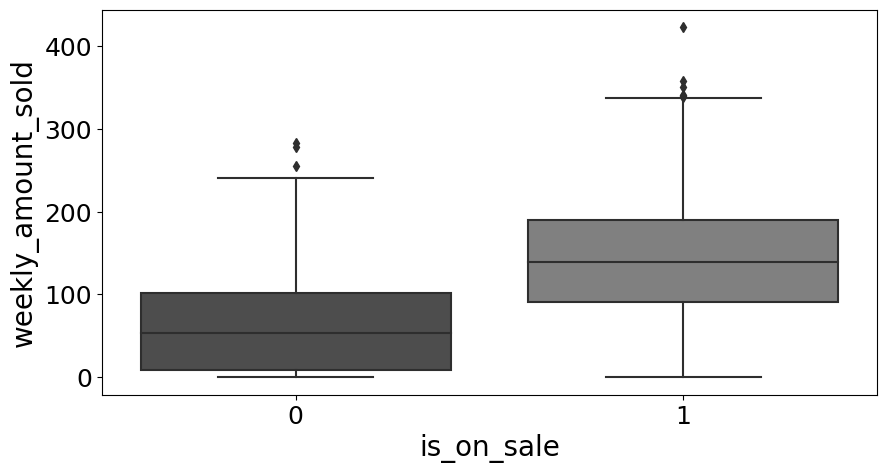

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(y="weekly_amount_sold", x="is_on_sale", data=data, ax=ax)

ax.set_xlabel("is_on_sale", fontsize = 20)
ax.set_ylabel("weekly_amount_sold", fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=18)

### 1.4.3 인과모델
* 인과모델 (casual model)은 화살표로 표시하는 일련의 할장 매커니즘이다. 
    * 변수 u 를 상ㅇ해 모델 외부의 변수를 나타내며 한 변수를 다른 변쉐 매핑하는 함수 f가 있다.
$$T \leftarrow f_{t}(u_{t})$$
$$Y \leftarrow f_{y}(T, u_{y})$$

* 위의 첫 번째 식에서 모델링하지 않는 변수 집합(외부변수) 가 함수를 통해 처치변수 T를 유발하는 원인이 된다.
* 두 번쨰 식에서 처치변수 T는 다른 변수 집합과 함께 함수를 통해 결과 Y를 유발한다.
* 모델링하지 않기로 선택한 변수라 하더라도 결과에 영향을 미치게 된다. 이러한 변수들을 정의하는 목적은 모델에 포함된 변수로는 아직 설명되지 않은 변수의 모든 변동을 설명하기 위함이다. 이러한 변수들을 내생변수(endogenous variable) 라고 한다.

### 1.4.4 개입
* 인과 모델이 있다면 해당 모델을 고치고 개선해서 인과적 질문의 답을 찾을 수 있다. 이를 개입(intervention) 이라 부른다.
* 이는 처치를 $t_{0}$ 라고 설정한다면 결과 Y에 어떤 일이 일어날까에 대한 사고 실험이다.
* 선택은 처치에 따라 표본을 필터링하고 개입은 전체 표본의 처치 여부를 통제 한다.

### 1.4.5 개별 처치효과
* 개별 처치 효과는 개별 실험 대상 i에 대해 처치가 결과에 미치는 영향이다.
$$\tau_{i} = Y_{i}|do(T=t_{1}) - Y_{i}|do(T=t_{0})$$
* 위 식을 예제에 적용하면 아래와 같다.
$$\tau_{i} = AmountSold_{i}|do(IsOnSales = 1) - AmountSold_{i}|do(IsOnSales = 0)$$
* 인과추론의 근본적인 문제 때문에 위 식 중 한 가지 항에 대해서만 관측이 가능하다.


### 1.4.6 잠재적 결과
* 인과추론에서 널리 사용하는 개념인 잠재적 결과(potential outcome) 은 처치가 $t$ 인 상황에서 실험 대상 i의 결과는 Y가 될 것이다 를 의미한다.
* 즉 $Y_{1i}$ 는 실험 대상이 처치를 받았을 때 잠재적 결과, $Y_{0i}$ 는 실험 대상이 처치를 받지 않았을 때의 잠재적 결과를 의미한다.
* 잠재적 결과에 따른 인과 효과는 위의 두 요소의 차이로 정의할 수 있다.

### 1.4.7 일치성 및 SUTVA 가정
* 위 식에는 두 가지 숨겨진 가정 있다.
    * 잠재적 결과가 처치와 일치성이 있어야 한다.
        * 일치성은 두 가지의 경우에 위배될 수 있다.
            * 처치를 여러번 했는데도 그 중 일부만 한 경우 (ex. 할인 쿠폰이 매출에 미치는 영향을 알고자 할 때, 할인 쿠폰이 여러번 발급되었다면 일치성 가정을 위배할 수 있다.)
            * 처치가 절못된 경우 (ex. 재무 설계사의 도움이 개인 자산에 미치는 영향을 알고자 할 때, 도움을 정의하기 어려울 대)
    * 상호 간섭 없음 (stable unit of treatment value assumption SUTVA)
        * 한 실험 대상의 처치가 다른 대상의 결과에 영향을 미치지 않는 것을 가정하는 것이다.
        * 파급효과(spillovers effect) 또는 네트워크 효과가 있는 경우 이러한 가정은 위배된다. (ex. 백신 접종과 점염 가능성의 관계 연구)

### 1.4.8 인과 추정량
* 개별 효과는 알 수 없지만 데이터에서 학습할 수 있는 인과 추정량은 아래와 같다.
* 평균처치효과 average treatment effect(ATE)
    * ATE = $E[\tau_{i}]$
    * ATE = $E[Y_{1i} - Y_{0i}]$
    * ATE = $E[Y|do(T=1) - E[Y|do(T=0)]]$
* 데이터에서 ATE를 추정하고 싶다면 기댓값을 표본평균으로 대체할 수 있다.

* 실험군에 대한 평균처치효과 average treatment effect on the treated (ATT)
    * ATT = $E[Y_{1i}-Y_{0i}|T=1]$
    * 이는 처치 받은 대상에 대한 처치 효과를 의미한다.
* 조건부 평균 처치효과 conditional average treatment effect (CATE)
    * CATE = $E[Y_{1i}-Y_{0i}|X=x]$
    * 변수 X 로 정의된 그룹에서의 처치효과를 의미한다. 예를 들면 이메일이 45세 이상의 고객과 그보다 젊은 고객에 미치는 영향을 알고자할 때 이러한 조건부 평균 효과를 통해 효과를 정의할 수 있다.

### 1.4.9 인과 추정량 예시
* 아래에서 첫번째 데이터프레임은 현실에서는 알 수 없는 반사실을 모두 알 수 있는 예제 데이터이다.
    * ATE = E(te)
    * ATT = (50+0+200)/3
    * CATE(x=1) = (100+200)/2 = 150
    * CATE(x=0) = (20+20+50+0)/4 = 22.5
* 두 번째 데이터프레임이 현실에서 얻을 수 있는 데이터라 할 수 있다. 이 데이터에서 단순하게 t에 따른 각 그룹의 y값의 평균 차이를 ATE로 계산한다면 연관관계를 인과관계로 착각한 케이스가 된다.

In [7]:
pd.DataFrame(dict(
    i= [1,2,3,4,5,6],
    y0=[200,120,300, 450,600,600],
    y1=[220,140,400, 500,600,800],
    t= [0,0,0,1,1,1],
    x= [0,0,1,0,0,1],
)).assign(
    y = lambda d: (d["t"]*d["y1"] + (1-d["t"])*d["y0"]).astype(int),
    te=lambda d: d["y1"] - d["y0"]
)

,i,y0,y1,t,x,y,te
0,1,200,220,0,0,200,20
1,2,120,140,0,0,120,20
2,3,300,400,0,1,300,100
3,4,450,500,1,0,500,50
4,5,600,600,1,0,600,0
5,6,600,800,1,1,800,200


In [8]:
pd.DataFrame(dict(
    i= [1,2,3,4,5,6],
    y0=[200,120,300, np.nan, np.nan, np.nan,],
    y1=[np.nan, np.nan, np.nan, 500,600,800],
    t= [0,0,0,1,1,1],
    x= [0,0,1,0,0,1],
)).assign(
    y = lambda d: np.where(d["t"]==1, d["y1"], d["y0"]).astype(int),
    te=lambda d: d["y1"] - d["y0"]
)

,i,y0,y1,t,x,y,te
0,1,200.0,NaN,0,0,200,NaN
1,2,120.0,NaN,0,0,120,NaN
2,3,300.0,NaN,0,1,300,NaN
3,4,NaN,500.0,1,0,500,NaN
4,5,NaN,600.0,1,0,600,NaN
5,6,NaN,800.0,1,1,800,NaN


## 1.5 편향
* 편향 bias 는 인과관계와 연관관계를 다르게 만드는 요소이다. 
### 1.5.1 편향식 
* 할인 예제에서의 수식적 이해
    * 연관관계 = $E[Y|T=1]- E[Y|T=0]$
    * 인과관계 = $E[Y_1 - Y_0](E[Y|do(t=1)]- E[Y|do(t=0)])$
* $E[Y|T=1]- E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0]$ , 이 식에 처치를 받지 않았다면 실험군의 결과가 어땠을지의 반사실적 결과인 $E[Y_0|T=1]$ 을 양변에 더하고 빼면 아래와 같다.
    * $E[Y|T=1]- E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] + E[Y_0|T=1] - E[Y_0|T=1]$
    * $E[Y|T=1]- E[Y|T=0] = E[Y_1- Y_0|T=1] + {E[Y_0|T=1]- E[Y_0|T=0]}$
    * 위 식의 우변에 해당하는 항목이 각각 ATT + 편향이 된다.
    * 편향은 처치와 관계없이 실험군과 대조군이 어떻게 다른지에 따라 주어지고 이는 $Y_0$의 차이로 표현된다.
* 편향은 교란confounding 에 의해 발생한다. 실험군과 대조군은 교환 가능exchangeable 해야 인과 효과를 추정할 수 있다.

 
### 1.5.2 편향의 시각적 가이드
* 예시에서 확인한 것 처럼 편향의 수식적 정의와 마찬가지로 아래 그래프로 $E[Y_0|T=1] > E[Y_0|T=0]$ 이 성립하는 것을 알 수 있다.
    * 가격을 할인한 (T=1) 회사의 수와 할인하지 않았을 때의 해당 회사의 결과(Y0)가 모두 회사의 규모에 따라 증가하므로 상향 편향 upward bias 가 있다.

<Figure size 640x480 with 0 Axes>

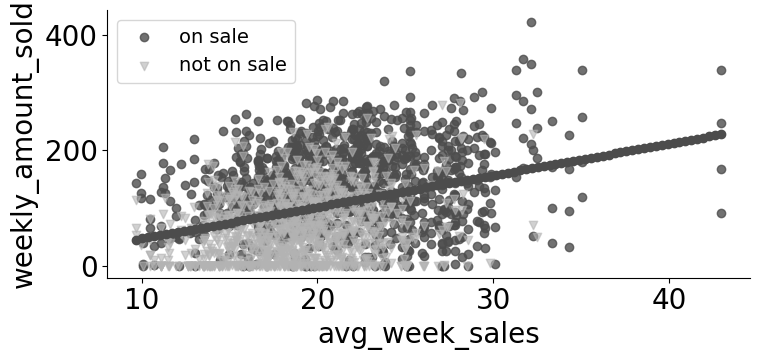

In [11]:
plt.rc('font', size=20)
fig = plt.figure()    

sns.lmplot(data=data,
           ci=None,
           x="avg_week_sales",
           y="weekly_amount_sold",
           scatter=False,
           height=4, aspect=2)

plt.scatter(x=data.query("is_on_sale==1")["avg_week_sales"],
            y=data.query("is_on_sale==1")["weekly_amount_sold"],
            label="on sale",
            color=color[0], alpha=.8, marker=marker[0])

plt.scatter(x=data.query("is_on_sale==0")["avg_week_sales"],
            y=data.query("is_on_sale==0")["weekly_amount_sold"],
            label="not on sale",
            color=color[2], alpha=.6, marker=marker[1])
plt.legend(fontsize="14")
    


* 회사의 규모를 나타내는 변수가 있다고 가정해보자. 회사 규모가 클수록 더 많이 판매하는 증가 추세를 확인할 수 있다.
* 두 번째 그림에서 확인할 수 있듯이, 판매량의 차이에는 처치효과와 회사 규모에 따른 효과가 섞여 있다. 

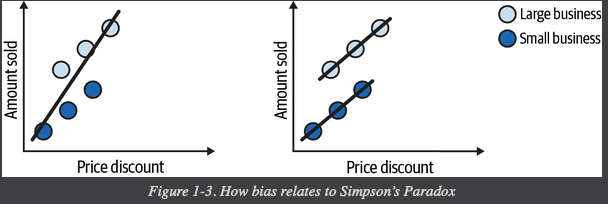

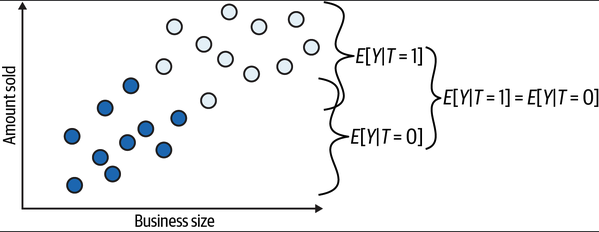

* 아래 그림처럼 모든 실험 대상이 처치 받지 않도록 설정하면 편향을 나타낼 수 있다. 처치가 없는 상태에서 실험군과 대조군의 잠재적 결과가 서로 어떻게 다른지 확인하고 이 때 차이가 있다면 처치 외 다른 요인 때문에 실험군과 대조군의 차이가 생긴것이라 판단할 수 있다.
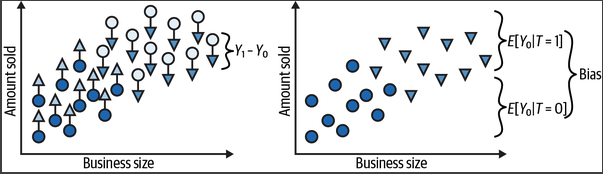

## 1.6 처치효과 식별하기
* 관측 가능한 데이터에서 인과 추정량을 찾아내는 방법을 식별 과정이라 한다.
* 인과적 식별은 편향을 없애는 과정으로도 볼 수 있다.
    * $E[Y_0|T=0] = E[Y_0|T=1]$ 이라면 연관관계는 인과관계가 된다.
    * 위 식은 처치와 관계없이 대조군과 실험군이 비교 가능함을 의미한다.
    * 또한 실험군과 대조군이 처치에 유사하게 반응하면 (즉, $E[Y_1-Y_0|T=1] = E[Y_1-Y_0 |T=0]$) 평균의 차이가 평균 인과효과가 된다.
        * $E[Y|T=1] - E[Y|T=0] = ATT = ATE = E[Y_1-Y_0]$
*  수식적으로는 복잡해보일 수 있지만 실험군과 대조군이 서로 교환 가능하다면 데이터에서 관측할 수 있는 수치로 인과관계를 표현할 수 있다. (예시에서 가격을 할인한 회사와 그렇지 않은 회사가 서로 비슷하다면 두 그릅 간의 판매량 차이는 전적으로 가격할인 떄문이라 할 수 있다.)
 
### 1.6.1독립성 가정
* 가격할인 예시에서 단순히 모든 회사가 할인하지 않았다면 할인을 한 회사와 그렇지 않은 회사를 구분할 수 없어야 한다. 
* 독립성 가정은 처치 여부에 관계없이 실험군과 대조군 모두 서로 비교 가능하고 구별할 수 없다는 뜻을 의미한다. (잠재적 결과와 처치가 서로 독립)

### 1.6.2 랜덤화와 식별
* 인과 추론 문제는 보통 두 단계로 나뉜다.
    * 식별 identification : 관측 가능한 데이터로 인과 추정량을 표현하는 방법을 알아내는 단계
    * 추정 estimation : 실제로 데이터를 사용해 앞서 식별한 인과 추정량을 추정하는 단계
* 랜덤화는 처치 배정 매커니즘이 완전히 알려졌기 때문에 앞의 인과모델에서 외부 변수 $u_t$ 가 사라진다.
$$IsonSales \leftarrow rand(t)$$
$$AmountSold \leftarrow f_y(IsOnSales, u_y)$$

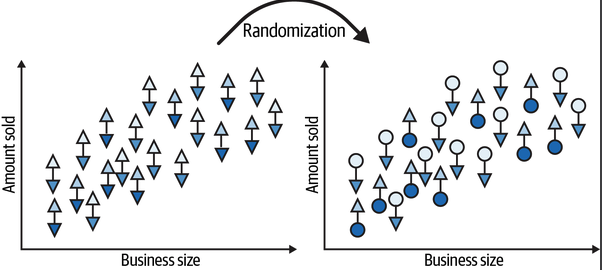

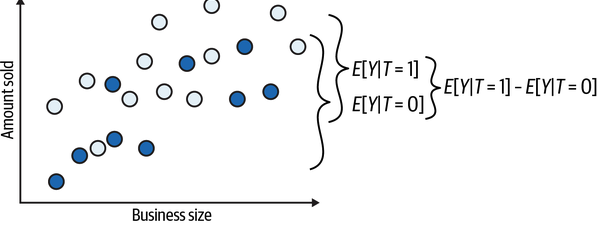

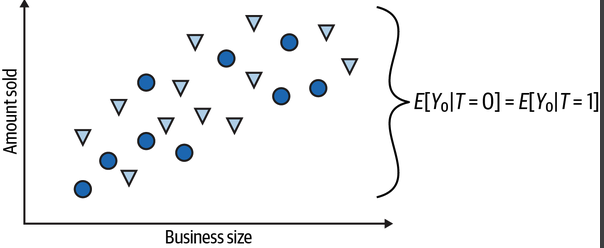

* 위 그림들에서 랜덤화를 통해 어떻게 편향이 없어지는지를 볼 수 있다. 두 번째 그림에서 실험군과 대조군의 결과 차이는 평균 인과효과라고 볼 수 있다. 
* 관측되는 모든 차이는 처치 때문에 발생하며 편향이 없음을 의미한다. 모든 대상이 처치 받지 않는 상태로 설정해 $Y_0$ 만 고나측한다면 실험군과 대조군간의 차이도 없을 것이다.
* 인과적 식별은 편향을 제거하고 실험군과 대조군을 비교할 수 있게 만드는 방법을 찾아내 눈에 보이는 모든 차이를 처치에 따른 효과로 돌리도록 하는 과정이다.
    * 식별은 데이터 생성 과정을 알거나 기꺼이 가정할 수 있는 경우에만 가능하다. (처치가 어떻게 배정되었는지를 알 수 있을 때 식별이 가능하다.)

## 1.7 요약
* 특정 처치 T=t 를 받았을 때 관측할 수 있는 결과를 잠재적 결과 Potential Outcome 라 한다.
* 실험군이 처치 이외의 이유 때문에 서로 다르다면 , 두 그룹간의 비교 시 실제 인과효과가 아닌 편향된 추정값이 산출된다.
* 실험군과 대조군이 교환 / 비교 가능하거나 처치를 무작위로 배정한 경우에는 실험군과 대조군의 결과를 단순 비교하면 처치효과를 얻을 수 있다.
* 인과추론을 적용할 때 필요한 주요 가정은 두 가지이다.
    * 처치 효과 추정 시 편향을 배제하기 위해 처치 배정과 잠재적 결과 사이에 독립성이 있다고 가정한다. (독립성 가정)
    * 한 실험 대상의 처치가 다른 대상의 결과에 영향을 미치 않아야 하며 (SUTVA) 모든 버전의 처치가 고려되었다고 가정한다. (일치성 가정)